In [1]:
import cv2, os, sys
import numpy as np

import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('../ch_1/figure/fig/cat.bmp')

if img is None:
    print('image load failed')
    sys.exit()
    
cv2.namedWindow('image')
cv2.imshow('image', img)

while True:
    key = cv2.waitKey()
    
    if key == 27:
        break
        
cv2.destroyAllWindows()

In [4]:
img_lists = os.listdir('../ch_1/figure/images/')

img_path = []

for i in img_lists:
    img_name = '../ch_1/figure/images/' + i
    img_path.append(img_name)
    
# print(img_path)

cv2.namedWindow('scene', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('scene', cv2.WND_PROP_FULLSCREEN,
                     cv2.WINDOW_FULLSCREEN)

idx = 0

while True:
    img = cv2.imread(img_path[idx])
    
    if img is None:
        print('read failed')
        break
        
    cv2.imshow('scene', img)
    
    if cv2.waitKey(3000) == 27:
        break
        
    idx += 1
    if idx >= len(img_path):
        idx = 0
        
cv2.destroyAllWindows()
    

In [5]:
src = cv2.imread('../ch_1/figure/fig/airplane.bmp')
mask = cv2.imread('../ch_1/figure/fig/mask_plane.bmp')
dst = cv2.imread('../ch_1/figure/fig/field.bmp')

cv2.copyTo(src, mask, dst)

cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
img = np.full((600, 1200, 3), 255, np.uint8)

cv2.line(img, (50, 50), (200, 50), (0, 0, 255), 3)
cv2.arrowedLine(img, (200, 50), (200, 200), (255, 0, 255), 3)

cv2.rectangle(img, (50, 300), (100, 400), (255, 0, 0), -1)
cv2.rectangle(img, (50, 300, 100, 400), (255, 0, 0), 4)

cv2.circle(img, (500, 300), 100, (0, 255, 255), 3, cv2.LINE_AA)
cv2.putText(img, 'Opencv', (500, 300), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
           1, (0, 0, 0), 2, cv2.LINE_AA)

cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed')
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('output.avi', fourcc, fps, (w, h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print('frame open failed')
        break
    out.write(frame)
    
    cv2.imshow('image', frame)
    
    if cv2.waitKey(30) == 27:
        break
        
cap.release()
out.release()

cv2.destroyAllWindows()

In [2]:
def call_mouse(event, x, y, flags, param):
    global oldx, oldy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        
    elif event =- cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y))
       
    
img = np.ones((500, 600, 3), np.uint8)*255

cv2.imshow('img', img)

cv2.setMouseCallback('img', call_mouse, img)

cv2.waitKey()
cv2.destroyAllWindows()

left button down 281 148
left button down 391 376
left button down 290 227


In [6]:
def call_track(pos):
    img[:] = img1 * (pos/255)
    cv2.imshow('img', img)

img = cv2.imread('../ch_1/figure/fig/airplane.bmp', 0)
img1 =img.copy()

cv2.imshow('img', img)

cv2.createTrackbar('level', 'img', 0, 255, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
src1 = cv2.imread('../Ch_3_Basic_img_proc/fig/lenna256.bmp', 0)
src2 = np.zeros((256, 256), np.uint8)

cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.)
dst3 = cv2.subtract(src2, src1)
dst4 = cv2.absdiff(src1, src2)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

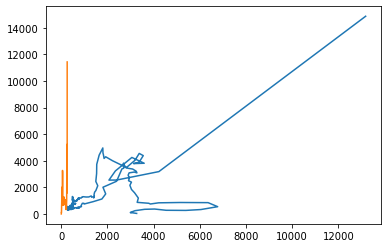

In [19]:
src = cv2.imread('../ch_1/figure/cat.bmp')

hist_b = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([src], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([src], [2], None, [256], [0, 256])

cv2.imshow('src', src)

plt.plot(hist_b, hist_g, hist_r)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
src = cv2.imread('../ch_4/puppy_shrink.png', 0)

src_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
src_equal = cv2.equalizeHist(src)

cv2.imshow('src', src)
cv2.imshow('src_norm', src_norm)
cv2.imshow('src_equal', src_equal)

cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
src = cv2.imread('../Ch_3_Basic_img_proc/fig/flowers.jpg', 1)

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(src_hsv)

v_norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX)
v_equal = cv2.equalizeHist(v)

src_norm = cv2.merge((h, s, v_norm))
src_equal = cv2.merge((h, s, v_equal))

src_norm = cv2.cvtColor(src_norm, cv2.COLOR_HSV2BGR)
src_equal = cv2.cvtColor(src_equal, cv2.COLOR_HSV2BGR)

cv2.imshow('src', src)
cv2.imshow('src_norm', src_norm)
cv2.imshow('src_equal', src_equal)

cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
def call_track(pos):
    hmin = cv2.getTrackbarPos('h_min', 'src')
    hmax = cv2.getTrackbarPos('h_max', 'src')
    dst = cv2.inRange(img_hsv, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow('src', dst)

img = cv2.imread('../ch_4/palette.png')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# dst_bgr = cv2.inRange(img, (100, 0, 0), (255, 50, 50))
# dst_hsv = cv2.inRange(img_hsv, (110, 200, 150), (130, 255, 255))

cv2.imshow('src', img)

cv2.createTrackbar('h_min', 'src', 50, 179, call_track)
cv2.createTrackbar('h_max', 'src', 80, 179, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'
